<a href="https://colab.research.google.com/github/olinyoder2534/TensorflowPractice/blob/main/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)

60000
10000
(28, 28)


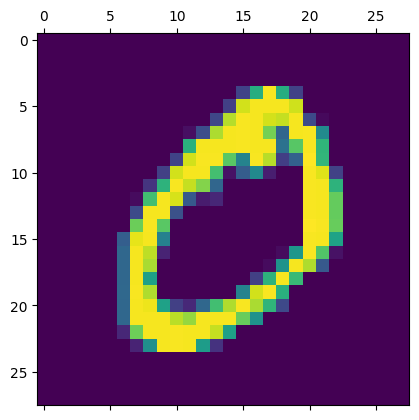

In [4]:
plt.matshow(X_train[1])

In [5]:
y_train[1]

0

In [6]:
#manually flatten array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [7]:
print(X_train_flattened.shape[0])
print(X_train_flattened.shape)

60000
(60000, 784)


In [8]:
model1 = keras.Sequential ([
    keras.layers.Dense(10, input_shape = (784,) ,activation = 'sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.7197 - accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1210 - accuracy: 0.8793
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6895 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6131 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3271 - accuracy: 0.8872


In [9]:
X_train_flattened_decimal = X_train_flattened/255
X_test_flattened_decimal = X_test_flattened/255

In [10]:
model2 = keras.Sequential ([
    keras.layers.Dense(10, input_shape = (784,) ,activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened_decimal, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4684 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9253


In [11]:
print(model1.evaluate(X_test_flattened, y_test))
print(model2.evaluate(X_test_flattened_decimal, y_test))

313/313 [==============================] - 0s 964us/step - loss: 5.7557 - accuracy: 0.8937
[5.75569486618042, 0.8937000036239624]
313/313 [==============================] - 0s 947us/step - loss: 0.2655 - accuracy: 0.9258
[0.2655204236507416, 0.9258000254631042]


7


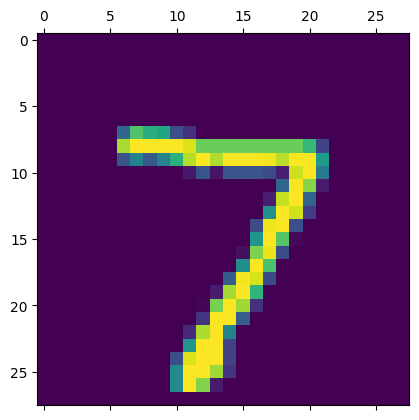

In [12]:
#checking performance on first image
plt.matshow(X_test[0])
print(y_test[0])

In [13]:
y_predicted1 = model1.predict(X_test_flattened)
y_predicted2 = model2.predict(X_test_flattened_decimal)

#first model predicts incorrectly
print(y_predicted1[0])
print(np.argmax(y_predicted1[0]))

print(y_predicted2[0])
print(np.argmax(y_predicted2[0]))

313/313 [==============================] - 0s 803us/step
[7.952656e-01 0.000000e+00 9.195699e-09 1.000000e+00 2.179231e-31
 1.000000e+00 0.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
3
[1.5277432e-02 2.2744412e-07 3.9671242e-02 9.4429713e-01 3.0440574e-03
 1.1187194e-01 8.0205484e-07 9.9980122e-01 8.2320854e-02 6.1877280e-01]
7


2


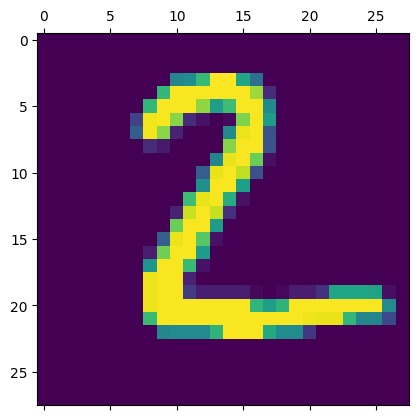

In [14]:
#checking performance on second image
plt.matshow(X_test[1])
print(y_test[1])

In [15]:
print(y_predicted1[1])
print(np.argmax(y_predicted1[1]))

print(y_predicted2[1])
print(np.argmax(y_predicted2[1]))
#can see pretty obvious flaws in the first model, second model is much better, going to use it only moving forward

[1.        0.9998007 1.        1.        0.        1.        1.
 0.        1.        0.       ]
0
[4.3080452e-01 4.9915235e-03 9.9949932e-01 3.8490537e-01 1.0810385e-09
 8.5508370e-01 8.3327836e-01 1.0057745e-12 1.6725004e-01 2.8939360e-09]
2


In [ ]:
y_predicted_labels = [
    np.argmax(y_predicted2) for i in y_predicted2
]

#don't have enough RAM to run the following CF
tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [16]:
#adding a hidden layer
model3 = keras.Sequential ([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.fit(X_train_flattened_decimal, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9839


In [17]:
model3.evaluate(X_test_flattened_decimal, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9725


[0.08533763140439987, 0.9725000262260437]

In [19]:
model3 = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.fit(X_train/255, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1200 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9839


In [20]:
model4 = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model4.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model4.fit(X_train/255, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6540 - accuracy: 0.8342
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2935 - accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2629 - accuracy: 0.9265
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2396 - accuracy: 0.9328


In [34]:
#using AdamW optimizer
from keras.optimizers import Optimizer
from keras import backend as K

class AdamW(Optimizer):
    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0., weight_decay=0.025, **kwargs):
        super(AdamW, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = lr  # Set learning rate directly
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            self.weight_decay = K.variable(weight_decay, name='weight_decay')
        if epsilon is None:
            epsilon = K.epsilon()
        self.epsilon = epsilon
        self.initial_decay = decay

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * K.cast(self.iterations, K.dtype(self.decay))))

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) / (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        self.weights = [self.iterations] + ms + vs

        for p, g, m, v in zip(params, grads, ms, vs):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon) - self.weight_decay * lr_t * p

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {
            'lr': float(K.get_value(self.lr)),
            'beta_1': float(K.get_value(self.beta_1)),
            'beta_2': float(K.get_value(self.beta_2)),
            'decay': float(K.get_value(self.decay)),
            'weight_decay': float(K.get_value(self.weight_decay)),
            'epsilon': self.epsilon
        }
        base_config = super(AdamW, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [36]:
model5 = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

#model5.compile(
    #optimizer = AdamW(lr=0.001),
    #loss = 'sparse_categorical_crossentropy',
    #metrics = ['accuracy']
#)

#model5.fit(X_train/255, y_train, epochs = 5)